In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [19]:
df.groupby('sex')['survived'].mean().to_frame()
df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [12]:
df.groupby(['sex', 'class'])[['survived']].mean()

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [67]:
df.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
df.pivot_table('survived', index='sex', columns='class') # aggregation "mean" by default
df.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### MULTI-LEVEL PIVOT TABLES

In [149]:
cut_age = pd.cut(df['age'], [0, 18, 80])
df.pivot_table('survived', ['sex', cut_age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [36]:
fare = pd.qcut(df['fare'], 2)
df.pivot_table('survived', ['sex', cut_age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### AGGREGATION

In [42]:

df.pivot_table(index='sex', columns='class', aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

### MARGING TO COMPUTE THE TOTAL

In [68]:
df.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### GROUPING

In [93]:
df['fare_range'] = df['fare'] // 100
df.pivot_table('survived', index='fare_range', columns='class', aggfunc='sum')

class,First,Second,Third
fare_range,,,
0.0,97,87,119
1.0,25,0,0
2.0,11,0,0
5.0,3,0,0


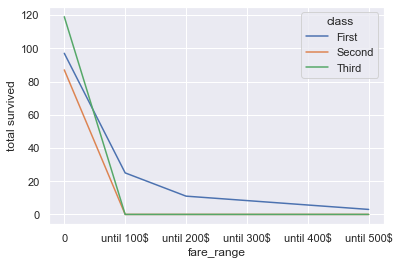

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
df.pivot_table('survived', index='fare_range', columns='class', aggfunc='sum').plot()
plt.gca().set_xticklabels(['', '0', 'until 100$', 'until 200$', 'until 300$', 'until 400$', 'until 500$'])
plt.ylabel('total survived');

In [146]:
cut_age = pd.cut(df['age'], [0, 18, 80])
df.pivot_table('survived', index=['sex',cut_age])

survived
sex    age               
female (0, 18]   0.676471
       (18, 80]  0.782383
male   (0, 18]   0.338028
       (18, 80]  0.180628

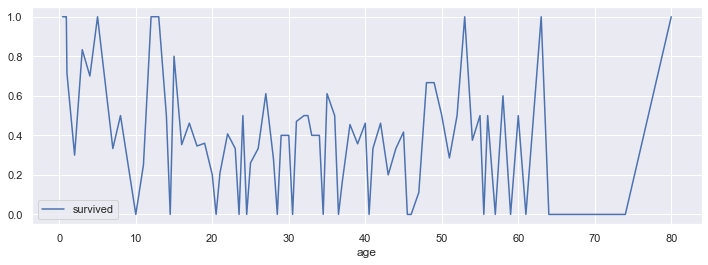

In [172]:
df_test = df.pivot_table('survived', index='age')
fig, ax = plt.subplots(figsize=(12, 4))
df_test.plot(ax=ax);